In [2]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Exercises

In [5]:
df = pd.read_csv(url)

In [7]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [8]:
# It looks like every row is a date, so 
# let's treat it like a datetime index
df['Date'] = pd.to_datetime(df.Date)

/var/folders/64/db_n95vn5jbbj1ysbq4cwd_r0000gn/T/ipykernel_3599/3246387676.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df.Date)


In [14]:
# note on this warning -- pandas is telling us its not sure if we
# got what we wanted out of its interpretation of the formatting.
# robust fix: feed it date formatting when we pass pd.to_datetime
# easy fix: glance and notice that it did the thing we wanted to.
df = df.set_index('Date')

In [16]:
# let's add a month feature now that we have a datetime index
df['Month'] = df.index.month_name()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          365 non-null    object 
 1   Temperature  365 non-null    float64
 2   Rainfall     365 non-null    float64
 3   Flyers       365 non-null    int64  
 4   Price        365 non-null    float64
 5   Sales        365 non-null    int64  
 6   Month        365 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 22.8+ KB


In [ ]:
# narrow down my results into just numerical columns:

In [24]:
# pd.DataFrame.select_dtypes?

In [25]:
# initialize two empty lists,
# add numerical ones to the num_cols,
# toss anything else to cat_cols
num_cols, cat_cols = [], []
for col in df.columns:
    if np.issubdtype(df[col], np.number):
        num_cols.append(col)
    else:
        cat_cols.append(col)

In [26]:
cat_cols

['Day', 'Month']

In [27]:
num_cols

['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

In [22]:
df.Month.dtype == 'O'

True

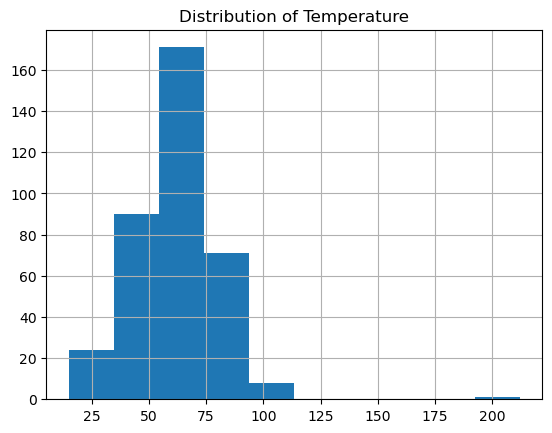

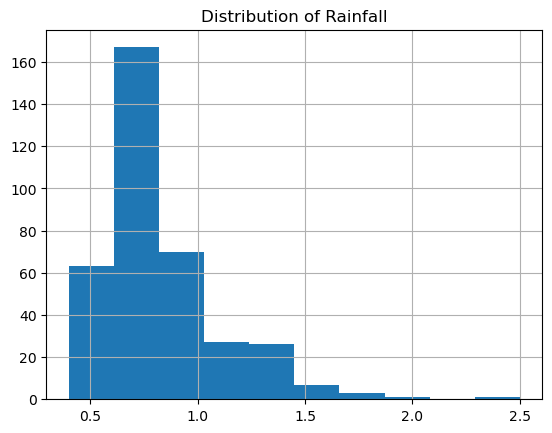

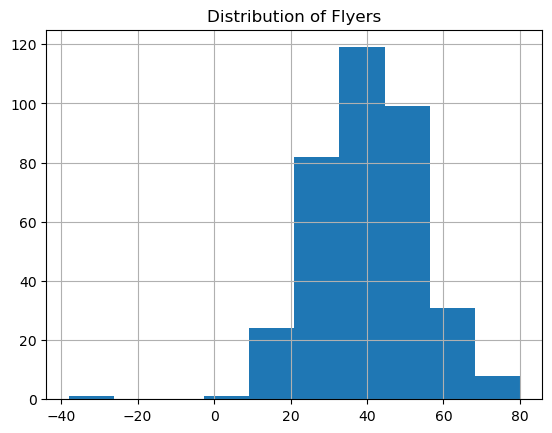

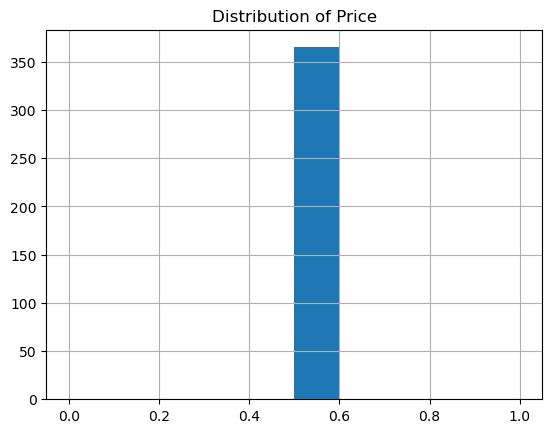

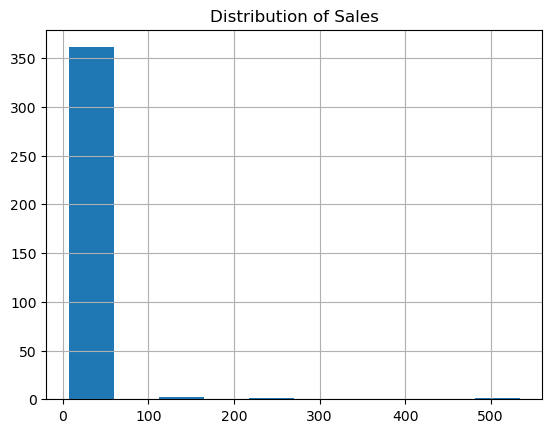

In [28]:
# initial visual check:
# histograms of numerical information
for col in num_cols:
    df[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

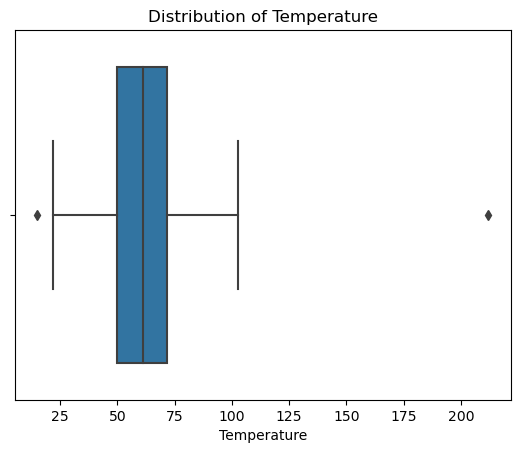

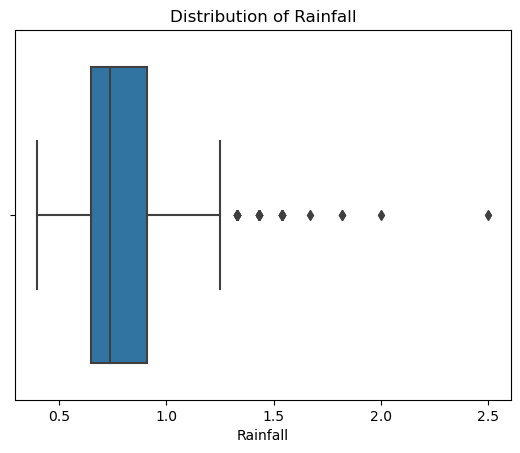

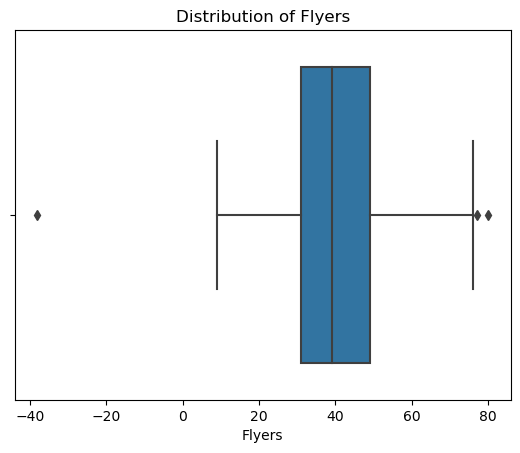

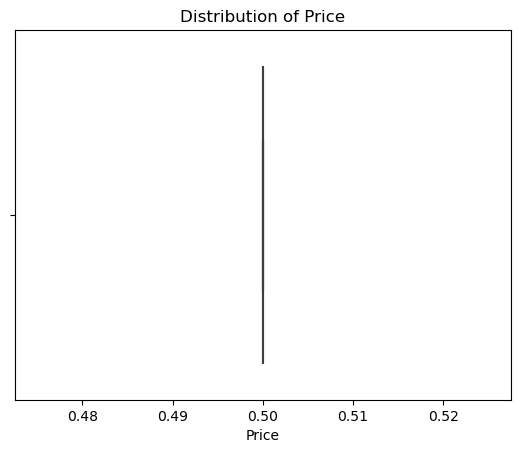

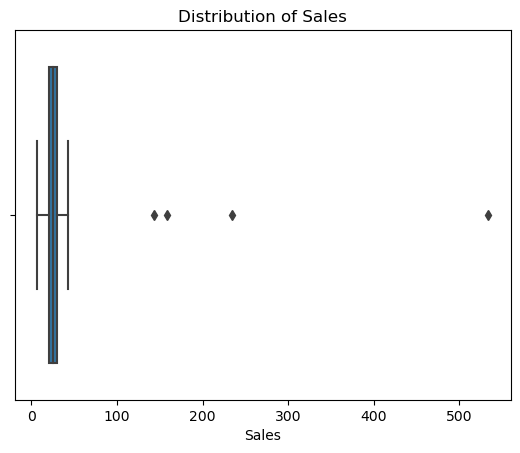

In [30]:
for col in num_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

Cursory visualization assessment:
 - One day with extremely temperature
 - One day with negative flyers
 - Heavy rainfall day(s)?
 - Extremely high sale days

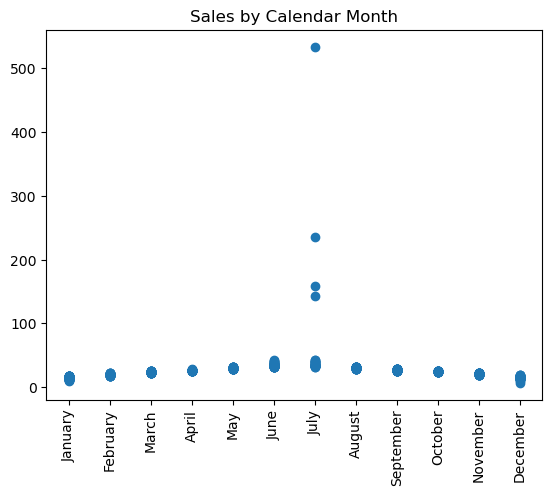

In [32]:
# sales, based on day/month
plt.scatter(df.Month, df.Sales)
plt.title('Sales by Calendar Month')
plt.xticks(rotation=90)
plt.show()

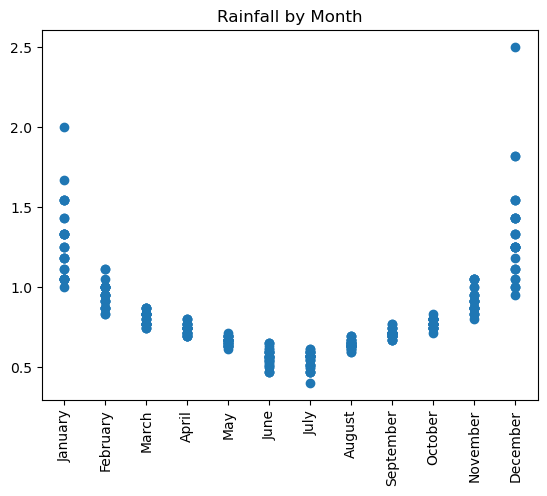

In [33]:
# what about rainfall
plt.scatter(df.Month, df.Rainfall)
plt.title('Rainfall by Month')
plt.xticks(rotation=90)
plt.show()

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [34]:
def get_lower_and_upper_bounds(col, k=1.5):
    '''
    get_upper_and_lower_bounds will take in two arguments:
    col, positional, a pandas Series
    k, kwarg, the multiplier for the fence multiplied by the IQR
    
    returns: lower_fence, upper_fence, values representing
    the respective lower and upper fence based on the Tukey method
    as per the k multiplier specified
    '''
    q1, q3 = col.quantile(0.25), col.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - iqr*k
    upper_fence = q3 + iqr*k
    return lower_fence, upper_fence
    
    

In [35]:
get_lower_and_upper_bounds(df['Rainfall'])

(0.26, 1.3)

Using lemonade.csv dataset and focusing on continuous variables:
Use the IQR Range Rule and the upper and lower bounds to identify the lower and upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

 Do that again, but with a k of 3

In [41]:
# initialize an empty dictionary (to hold my outliers)
outliers = {}
# for every column (string literal) in my num cols:
for col in num_cols:
    #define a new place for my outlier fences to sit,
    #based on the column name
    # such as outliers['Rainfall'] = {}
    outliers[col] = {}
    #define my k
    k = 1.5
    # call my custom fence function, which returns two values
    # put it in my dictionary under the column name, but also
    # under the specific fence value
    # outliers['Rainfall'][1.5] = (lower_val, upper_val)
    outliers[col][k] = get_lower_and_upper_bounds(df[col], k=k)
    print(f' For column {col}')
    # print my dataframe, but only the rows that are below that 
    # lower fence, or above my upper fence
    # take that set of rows, transpose them
    # put it in markdown table format
    # and print it
    print(df[(df[col] < outliers[col][k][0]) | 
       (df[col] > outliers[col][k][1])].to_markdown())
    print('===============')
    
    

 For column Temperature
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |         212   |       0.91 |       35 |     0.5 |      21 | February |
| 2017-12-31 00:00:00 | Sunday   |          15.1 |       2.5  |        9 |     0.5 |       7 | December |
 For column Rainfall
| Date                | Day       |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |
|:--------------------|:----------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday    |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-01-02 00:00:00 | Monday    |          28.9 |       1.33 |       15 |     0.5 |      13 | January  |
| 2017-01-03 00:00:00 | Tuesday   |          34.5 |       1.33 |       27 |     0.5 |      15 | January

Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
    Use a 2 sigma decision rule to isolate the outliers.
        Do these make sense?
        Should certain outliers be kept or removed?

In [38]:
outliers

{'Temperature': {1.5: (16.700000000000003, 104.7)},
 'Rainfall': {1.5: (0.26, 1.3)},
 'Flyers': {1.5: (4.0, 76.0)},
 'Price': {1.5: (0.5, 0.5)},
 'Sales': {1.5: (5.0, 45.0)}}

In [42]:
# initialize an empty dictionary (to hold my outliers)
# for every column (string literal) in my num cols:
for col in num_cols:
    #define a new place for my outlier fences to sit,
    #based on the column name
    #define my k
    k = 3
    # call my custom fence function, which returns two values
    # put it in my dictionary under the column name, but also
    # under the specific fence value
    # outliers['Rainfall'][1.5] = (lower_val, upper_val)
    outliers[col][k] = get_lower_and_upper_bounds(df[col], k=k)
    print(f' For column {col}')
    # print my dataframe, but only the rows that are below that 
    # lower fence, or above my upper fence
    # take that set of rows, transpose them
    # put it in markdown table format
    # and print it
    print(df[(df[col] < outliers[col][k][0]) | 
       (df[col] > outliers[col][k][1])].to_markdown())
    print('===============')

 For column Temperature
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 | February |
 For column Rainfall
| Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday  |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-12-05 00:00:00 | Tuesday |          22   |       1.82 |       11 |     0.5 |      10 | December |
| 2017-12-10 00:00:00 | Sunday  |          31.3 |       1.82 |       15 |     0.5 |      11 | December |
| 2017-12-31 00:00:00 | Sunday  |          15.1 |       2.5  |        9 |     0.5 |       7 | December |
 For co

In [45]:
outliers['Temperature'][3]

(-16.299999999999997, 137.7)

Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [48]:
col

'Sales'

In [59]:
# remember order of operations!
# (we need to encapsulate our numerator)
df[((df['Flyers'] - df['Flyers'].mean()) / df['Flyers'].std()).abs() > 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November


In [63]:
for col in num_cols:
    print(f' For Column {col}')
    print(df[((df[col] - df[col].mean()) / df[col].std()).abs() > 2].to_markdown())

 For Column Temperature
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |         212   |       0.91 |       35 |     0.5 |      21 | February |
| 2017-06-16 00:00:00 | Friday   |          99.3 |       0.47 |       77 |     0.5 |      41 | June     |
| 2017-06-26 00:00:00 | Monday   |         102.6 |       0.47 |       60 |     0.5 |      42 | June     |
| 2017-07-01 00:00:00 | Saturday |         102.9 |       0.47 |       59 |     0.5 |     143 | July     |
| 2017-07-10 00:00:00 | Monday   |          98   |       0.49 |       66 |     0.5 |      40 | July     |
| 2017-07-18 00:00:00 | Tuesday  |          99.3 |       0.47 |       76 |     0.5 |      41 | July     |
| 2017-07-22 00:00:00 | Saturday |          99.6 |       0.47 |       49 |     0.5 |      42 | July     |
| 2017-07-27 00:00:00 

Takeaways: 
 - temperature to high to live in, we can fix that probably
 - Negative flyer value
 - rainfall?
 - sales seem appropriate for summer

In [65]:
# Sales Check
df.loc['2017-06-30': '2017-07-05']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-06-30,Friday,89.4,0.53,47,0.5,38,June
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July
2017-07-05,Wednesday,93.0,0.40,55,0.5,40,July


In [69]:
# Rainfall check:
df.loc['2017-12']['Rainfall']
df.loc['2017-01']['Rainfall']

Date
2017-01-01    2.00
2017-01-02    1.33
2017-01-03    1.33
2017-01-04    1.05
2017-01-05    1.00
2017-01-06    1.54
2017-01-07    1.54
2017-01-08    1.18
2017-01-09    1.18
2017-01-10    1.05
2017-01-11    1.54
2017-01-12    1.33
2017-01-13    1.33
2017-01-14    1.05
2017-01-15    1.11
2017-01-16    1.67
2017-01-17    1.43
2017-01-18    1.18
2017-01-19    1.18
2017-01-20    1.43
2017-01-21    1.25
2017-01-22    1.11
2017-01-23    1.05
2017-01-24    1.54
2017-01-25    1.25
2017-01-26    1.25
2017-01-27    1.05
2017-01-28    1.33
2017-01-29    1.33
2017-01-30    1.05
2017-01-31    1.05
Name: Rainfall, dtype: float64

In [70]:
# seems like we sold a lot of lemonade around July 4, 
# and we have a lot of rain in the winter
# I'm going to call these results valid and consider them in further analysis

In [ ]:
# temp and flyers
# weird temp day: 2017-02-11
# weird flyer day: 2017-11-21

In [72]:
# let's look at the temp around 2-11:
df.loc['2017-02-08':'2017-02-13']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-08,Wednesday,52.6,0.87,31,0.5,22,February
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February
2017-02-10,Friday,50.0,0.91,40,0.5,20,February
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February
2017-02-13,Monday,46.4,1.11,34,0.5,18,February


In [74]:
df.Temperature.mean()

61.224657534246575

In [76]:
df.groupby('Month').Temperature.mean()['February']

53.67142857142857

In [78]:
(df.loc['2017-02-10','Temperature'] + df.loc['2017-02-12','Temperature']) / 2

52.8

In [79]:
df.loc['2017-02-11', 'Temperature'] = df.groupby('Month').Temperature.mean()['February']

In [80]:
df.loc['2017-02-08':'2017-02-13']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-08,Wednesday,52.600000,0.87,31,0.5,22,February
2017-02-09,Thursday,42.700000,1.00,39,0.5,19,February
2017-02-10,Friday,50.000000,0.91,40,0.5,20,February
2017-02-11,Saturday,53.671429,0.91,35,0.5,21,February
2017-02-12,Sunday,55.600000,0.83,41,0.5,22,February
2017-02-13,Monday,46.400000,1.11,34,0.5,18,February


In [81]:
df.loc['2017-11-19':'2017-11-22']['Flyers']

Date
2017-11-19    34
2017-11-20    41
2017-11-21   -38
2017-11-22    40
Name: Flyers, dtype: int64

In [85]:
df.loc['2017-11-21','Flyers'] = -1 * df.loc['2017-11-21','Flyers']

In [86]:
df.loc['2017-11-19':'2017-11-22']['Flyers']

Date
2017-11-19    34
2017-11-20    41
2017-11-21    38
2017-11-22    40
Name: Flyers, dtype: int64

Notes on process:
 - we examined a few weird values and took the procedural steps of visualiztions, IQR methodology and z score and scrutinized these data points by taking further analysis of context based on the time/days/rows around them
 
 - We concluded based on the level of info that we have, that rainfall and sales anomalies are likely valid
 - We concluded an erroneous flyer value was input negative and fixed it
 - we concluded an erroneous temp value was just wrong, so we guessed it based on aggregate imputation